# CIFAR10数据
CIFAR10是基本的图片数据库，共十个分类，训练集有50000张图片，测试集有10000张图片，图片均为32*32分辨率。Pytorch的torchvision可以很方便的下载使用CIFAR10的数据，代码如下：

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
#定义超参数
BATCH_SIZE = 4
EPOCH = 2

#torchvision模块载入CIFAR10数据集，并且通过transform归一化到[0,1]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train = True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = BATCH_SIZE,
                                          shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',train = False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = BATCH_SIZE,
                                          shuffle = False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')                                          


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# 显示图片

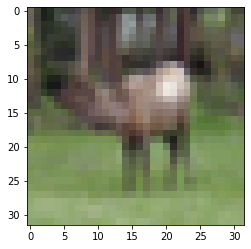

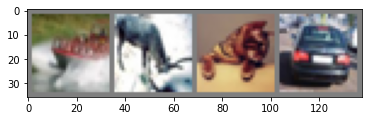

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(trainset.data[86]) #trainset.data中储存了原始数据，并且是array格式
plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
images_comb = torchvision.utils.make_grid(images)
images_comb_unnor = (images_comb*0.5+0.5).numpy()
plt.imshow(np.transpose(images_comb_unnor, (1, 2, 0)))
plt.show()


# 定义卷积神经网络

In [10]:
import torch.nn.functional as F
class CNN_NET(torch.nn.Module):
    def __init__(self):
        super(CNN_NET,self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 3,
                                     out_channels = 64,
                                     kernel_size = 5,
                                     stride = 1,
                                     padding = 0)
        self.pool = torch.nn.MaxPool2d(kernel_size = 3,
                                       stride = 2)
        self.conv2 = torch.nn.Conv2d(64,64,5)
        self.fc1 = torch.nn.Linear(64*4*4,384)
        self.fc2 = torch.nn.Linear(384,192)
        self.fc3 = torch.nn.Linear(192,10)

    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,64*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = CNN_NET()


# 损失函数和优化器

In [11]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
loss_func =torch.nn.CrossEntropyLoss() # 预测值和真实值的误差计算公式 (交叉熵)


# CNN训练

In [12]:
for epoch in range(EPOCH):
    running_loss = 0.0
    for step, data in enumerate(trainloader):
        b_x,b_y=data
        outputs = net.forward(b_x)
        loss = loss_func(outputs, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 打印状态信息
        running_loss += loss.item()
        if step % 1000 == 999:    # 每2000批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, step + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  1000] loss: 1.089
[1,  2000] loss: 0.951
[1,  3000] loss: 0.876
[1,  4000] loss: 0.822
[1,  5000] loss: 0.774
[1,  6000] loss: 0.745
[1,  7000] loss: 0.725
[1,  8000] loss: 0.694
[1,  9000] loss: 0.681
[1, 10000] loss: 0.655
[1, 11000] loss: 0.650
[1, 12000] loss: 0.628
[2,  1000] loss: 0.591
[2,  2000] loss: 0.573
[2,  3000] loss: 0.570
[2,  4000] loss: 0.563
[2,  5000] loss: 0.556
[2,  6000] loss: 0.543
[2,  7000] loss: 0.537
[2,  8000] loss: 0.526
[2,  9000] loss: 0.528
[2, 10000] loss: 0.521
[2, 11000] loss: 0.508
[2, 12000] loss: 0.501
Finished Training


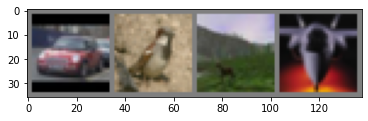

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images_comb = torchvision.utils.make_grid(images)
images_comb_unnor = (images_comb*0.5+0.5).numpy()
plt.imshow(np.transpose(images_comb_unnor, (1, 2, 0)))
plt.show()

predicts=net.forward(images)


# 验证测试集精度

In [14]:
correct = 0
total = 0
with torch.no_grad():
    #不计算梯度，节省时间
    for (images,labels) in testloader:
        outputs = net(images)
        numbers,predicted = torch.max(outputs.data,1)
        total +=labels.size(0)
        correct+=(predicted==labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))



Accuracy of the network on the 10000 test images: 66 %
